In [93]:
import pandas as pd
import os
from statistics import mean
import matplotlib.pyplot as plot

Za predjed bomo analizirali naslednje:
- pri kateri starosti šahisti dosežejo svoj največji ELO
- vpliv nacionalnosti na uspeh
- ali lahko glede na performance nižjih 100 določimo kdo bo prišel v višjih 100

Zanima nas pri kateri starosti šahisti dosežejo svoj vrhunec. Postopek, da pridobimo to informacijo bo naslednji:
1. Ustvarili bomo kopijo seznama sahisti ter v to kopijo shranili podatke o tem pri kateri starosti šahist doseže svoj največji ELO rating; podobno bomo naredili tudi z podatkom pri kateri starosti šahist doseže svoj največji indeks na lestvici najboljših 100 šahistov. Ta podatka nista nujno enakovredna, zaradi rating inflationa ([relevanten wikipedia snippet](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details)).
2. Statistično analizirali to - verjetno z preprosto aritmetično sredino.
3. Grafični prikaz podatkov.

In [94]:
pot = r'C:\Users\hugot\Documents\FMF\1_letnik\UVP-projektna-naloga\podatkovna_baza'
pot_shallow = r'C:\Users\hugot\Documents\FMF\1_letnik\UVP-projektna-naloga'
sahisti_elo = []

for filename in os.listdir(pot):
    ime_sahista = filename.replace('_', ' ')
    trenutni_maksimum = [(1-2000, 0)]
    datotecna_pot = os.path.join(pot, filename)
    podatki = pd.read_csv(datotecna_pot, index_col = 'datum', sep = ',')
    for datum, vrstica in podatki.iterrows():
        rating = int(vrstica['rating'])
        if rating > trenutni_maksimum[0][1]:
            trenutni_maksimum = [(datum, rating)]
        #naslednja vrstica poskrbi, da ne zgrešimo, če šahist doseže svoj najvišji 
        #rating več kot enkrat.
        elif rating == trenutni_maksimum[0][1]: 
            trenutni_maksimum.append((datum, rating))
    sahisti_elo.append({'Ime': ime_sahista, 'Maksimumi' : trenutni_maksimum})
#sahisti_elo je seznam slovarjev, vsebujoc informacje o imenu ter
#maksimalnih ratingih (datum, rating) kjer je rating sahistov najvisji rating, 
#datum pa eden izmed datumov, na katerega je slednjega dosegel

#Sedaj bomo v seznam slovarjev sahisti_elo za vsakega šahista dodali še starost, pri kateri je dosegel maksimalni rating, če je teh več pa več starosti.
general_info = pd.read_csv(os.path.join(pot_shallow, 'sahisti'), sep=',')

for sahist in sahisti_elo:
    ime_sahista = sahist['Ime']
    maksimumi = sahist['Maksimumi']
    sahist['Najvišji rating'] = maksimumi[0][1]
    sahist['Starosti ob najvišjih ratingih'] = []
    #Opomnik: maksimum je seznam nizov dveh podatkov, prvi je datum, drugi pa maksimalni elo šahista
    for indeks, vrstica in general_info.iterrows():
        if vrstica['Ime'] == ime_sahista:
            sahist['Leto rojstva'] = vrstica['Leto rojstva']
    for maksimum in maksimumi:
        sahist['Starosti ob najvišjih ratingih'].append(int(maksimum[0][3:]) - sahist['Leto rojstva'])
    sahist['Povprečna starost pri najvišjem ratingu'] = round(mean(sahist['Starosti ob najvišjih ratingih']), 1)
    sahist['Najmlajša starost pri najvišjem ratingu'] = min(sahist['Starosti ob najvišjih ratingih'])
    sahist['Največja starost pri najvišjem ratingu'] = max(sahist['Starosti ob najvišjih ratingih'])
sahisti_elo_pandas = pd.DataFrame(sahisti_elo, columns=['Ime', 'Leto rojstva', 'Najvišji rating', 'Povprečna starost pri najvišjem ratingu', 'Najmlajša starost pri najvišjem ratingu', 'Največja starost pri najvišjem ratingu'])

sahisti_elo_pandas.head(25)

,Ime,Leto rojstva,Najvišji rating,Povprečna starost pri najvišjem ratingu,Najmlajša starost pri najvišjem ratingu,Največja starost pri najvišjem ratingu
0,"Abasov, Nijat",1995,2679,28.0,28,28
1,"Abdusattorov, Nodirbek",2004,2769,20.0,20,20
2,"Acs, Peter",1981,2623,22.0,22,22
3,"Adams, Michael",1971,2761,44.7,42,46
4,"Adhiban, B",1992,2701,27.0,27,27
5,"Adianto, Utut",1965,2598,36.0,36,36
6,"Afromeev, Vladimir",1954,2646,53.8,53,54
7,"Agrest, Evgenij",1966,2616,38.0,38,38
8,"Akobian, Varuzhan",1983,2673,34.0,34,34
9,"Akopian, Vladimir",1971,2713,35.3,35,36


Uspešno smo sestavili razpredelnico, ki vsebuje imena vseh šahistov, leta rojstva, njihove najvišje ratinge ter povprečno starost pri najvišjem ratingu.
Zanima nas, pri kateri starosti šahisti v splošnem dosežejo svojo najvišji rating.

Da bi to analizirali uspešno moramo upoštevati še dejstvo, da nekateri igralci še niso dosegli svojega najvišjega ratinga; oz. ga trenutno dosegajo. Prvega faktorja žal ne moramo odpraviti, saj ne znamo predvideti, ali bo posameznik v prihodnosti postal boljši, slabši ali pa če bo celo nehal igrati šah na profesionalnem nivoju. Drugi faktor pa bomo nagovorili tako, da iz statistične analize eliminiramo vse igralce, ki so svoj najvišji rating dosegli v zadnjih 6 mesecih.

Carlsen, Magnus [('08-2019', 2882), ('05-2014', 2882)]
Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno 31.24. 
Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.


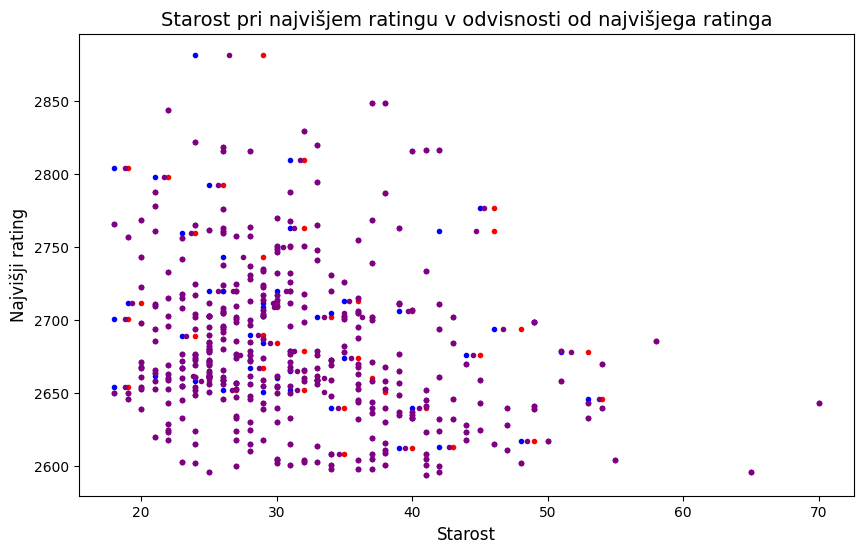

In [95]:
shp = sahisti_elo_pandas
shp = shp[shp['Povprečna starost pri najvišjem ratingu'] - (2024 - shp['Leto rojstva']) <= 0.5]

for sahist in sahisti_elo:
    if sahist['Najvišji rating'] > 2850:
        print(sahist['Ime'], sahist['Maksimumi'])

print(f'Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno {round(mean(shp['Povprečna starost pri najvišjem ratingu']), 2)}. \nBralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.')
#Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.

plot.figure(figsize=(10,6))
plot.scatter(shp['Največja starost pri najvišjem ratingu'], shp['Najvišji rating'], label='Največja starost pri najvišjem ratingu v odvisnosti od ratinga', color='red', marker='.')
plot.scatter(shp['Najmlajša starost pri najvišjem ratingu'], shp['Najvišji rating'], label='Najmlajša starost pri najvišjem ratingu v odvisnosti od ratinga', color='blue', marker='.')
plot.scatter(shp['Povprečna starost pri najvišjem ratingu'], shp['Najvišji rating'], label='Povprečna starost pri najvišjem ratingu v odvisnosti od ratinga', color='purple', marker='.')



plot.title('Starost pri najvišjem ratingu v odvisnosti od najvišjega ratinga', fontsize = 14)
plot.ylabel('Najvišji rating', fontsize=12)
plot.xlabel('Starost', fontsize=12)

plot.show()

Ugotovili smo, da je med najboljšimi 100 šahisti na svetu povprečna starost, pri kateri dosežejo svoj največji ELO rating (kar verjetno sovpada z njihovo najvišjo sposobnostjo v igri šaha), priblžno 31.24. 

Diagram prikazuje starost pri kateri igralci dosežejo svoj najvišji rating. Vijolične točke predstavljajo povprečno starost posameznika, ko je dosegel svoj najvišji rating, modra in rdeča pa zaporedoma najnižjo in najvišjo starost ko je dosegel svoj najvišji rating.

Žal ne opazimo nobenega trenda v podatkih, je pa vredno omembe, da skoraj vsi igralci dosežejo svoj najvišji rating le enkrat v življenju, ter se na isti nivo ne povzpnejo ponovno. Izjema je Magnus Carlsen, ki je svoj najvišji rating 2882 ELO dosegel 05-2014 ter 08-2019. Da je Magnus Carlsen izjema, pa ni prav veliko presenečenje.

Za glavno jed bomo analizirali trende v ELO ratingu top 5 igralcev za obdobje zadnjih 24 let.

To pomeni, da bomo za vsakega igralca, ki je v zadnjih 24 letih vstopil v top 5 igralcev, zabeležili ELO rating za vsak mesec, za katerega imamo podatke(sepravi za vsak mesec, ko je bil med najboljšimi 100 šahisti na svetu). Podatke bomo grafično predstavili kot zlomljenko.

In [97]:
#Ustvarimo linearno urejenost na datumih
def datum_to_float(datum):
    mesec = int(datum[0:2])
    leto = int(datum[3:])
    multiplier = 0.08
    return leto + mesec * multiplier

def float_to_datum(float):
    leto = int(float)
    mesec = round((float - leto) * 12.5)
    return f'{mesec}-{leto}'

#Napišimo program, ki zbere vse šahiste, ki so bili v top 5
sahisti_v_top_5 = {}
sahisti = pd.read_csv(os.path.join(pot_shallow, 'sahisti'), index_col= 'Ime')

for sahist in sahisti:
    podatki = pd.read_csv(os.path.join(pot, sahist.replace(' ', '_')))
    for indeks, vrstica in podatki.iterrows():
        if vrstica['rank'] < 6:
            sahisti_v_top_5[sahist] = (podatki['datum'][indeks], podatki['rating'][indeks])

print(len(sahisti_v_top_5))
#Plot

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hugot\\Documents\\FMF\\1_letnik\\UVP-projektna-naloga\\podatkovna_baza\\Leto_rojstva'